 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
whale_df= pd.read_csv(r'C:\Users\Yvonne Colangelo\Downloads\whale_returns.csv') 

In [5]:
#configuring the data series to match all fututre dataframes
# Reading whale returns
whale_df['Date']=pd.to_datetime(whale_df['Date'])
whale_df.set_index('Date', inplace=True)
whale_df.set_index('Date', inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [8]:
# Count nulls
whale_df.isnull().count()


SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [9]:
# Drop nulls
whale_df = whale_df.dropna(inplace = False)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [10]:
# Reading algorithmic returns
algo_df = pd.read_csv(r'C:\Users\Yvonne Colangelo\Downloads\algo_returns.csv')
#connfiguring date series
algo_df['Date']=pd.to_datetime(algo_df['Date'])
algo_df.set_index('Date', inplace=True)
algo_df.sort_index()

algo_df = algo_df.sort_index()
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls
algo_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [12]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P TSX 60 Closing Prices
tsx60_df = pd.read_csv(r'C:\Users\Yvonne Colangelo\Downloads\sp_tsx_history.csv')
#CONFIGURING DATE
tsx60_df['Date']=pd.to_datetime(tsx60_df['Date'])
tsx60_df.set_index('Date', inplace=True)
tsx60_df.sort_index()
tsx60_df.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [16]:
# Check Data Types
tsx60_df.dtypes

Close    object
dtype: object

In [17]:
#removing the dollar sign to fix data types
tsx60_df["Close"] = tsx60_df["Close"].str.replace("$" , "")
tsx60_df["Close"] = tsx60_df["Close"].str.replace("," , "")
tsx60_df["Close"] =tsx60_df["Close"].str.replace("." , "")

# Fix Data Types
tsx60_df["Close"] = tsx60_df["Close"].astype("float")
tsx60_df.head()

C:\Users\Yvonne Colangelo\AppData\Local\Temp\ipykernel_9020\27588513.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tsx60_df["Close"] = tsx60_df["Close"].str.replace("$" , "")
C:\Users\Yvonne Colangelo\AppData\Local\Temp\ipykernel_9020\27588513.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tsx60_df["Close"] =tsx60_df["Close"].str.replace("." , "")


,Close
Date,
2012-10-01,1237019.0
2012-10-02,1239123.0
2012-10-03,1235947.0
2012-10-04,1244768.0
2012-10-05,1241899.0


In [18]:
# Calculate Daily Returns
daily_return=tsx60_df.pct_change()
daily_return


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [19]:
# Drop nulls
new_tsx60 = daily_return.dropna().copy()
new_tsx60.isnull().sum()

Close    0
dtype: int64

In [20]:
# Rename `Close` Column to be specific to this portfolio.
tsx60_daily_return = new_tsx60.rename(columns={"Close": "S&P TSX60"})
tsx60_daily_return = pd.DataFrame(tsx60_daily_return)

tsx60_daily_return.head()

,S&P TSX60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, tsx60_daily_return], axis ="columns" ,join = 'inner')
combined_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

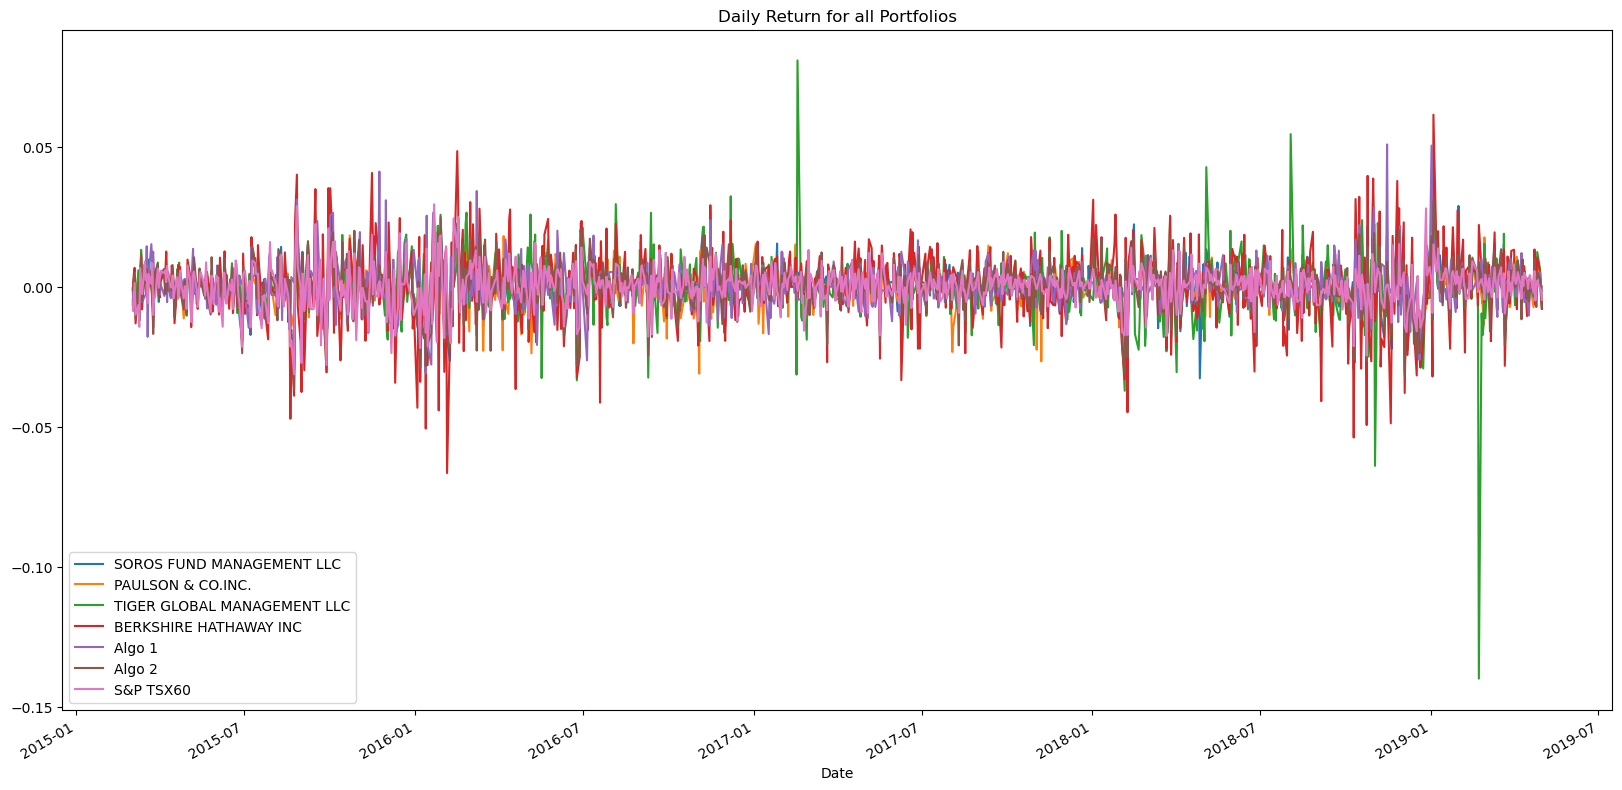

In [22]:
# Plot daily returns of all portfolios
ax=combined_df.plot(figsize = (20,10), title="Daily Return for all Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio cumulative return'}, xlabel='Date'>

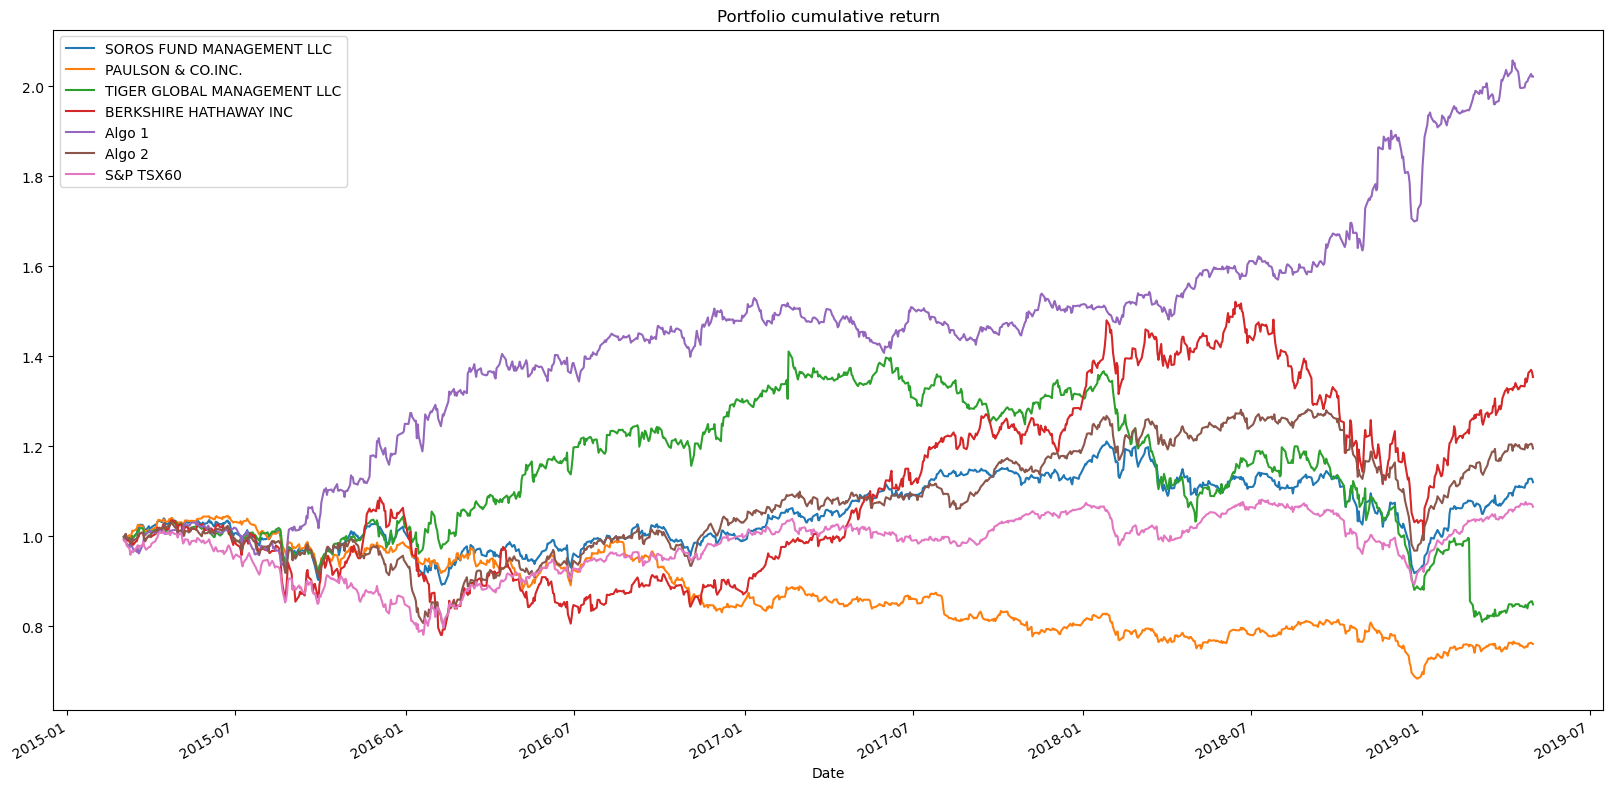

In [23]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + combined_df).cumprod() 
# Plot cumulative returns
cum_returns.plot(figsize = (20,10),title='Portfolio cumulative return')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

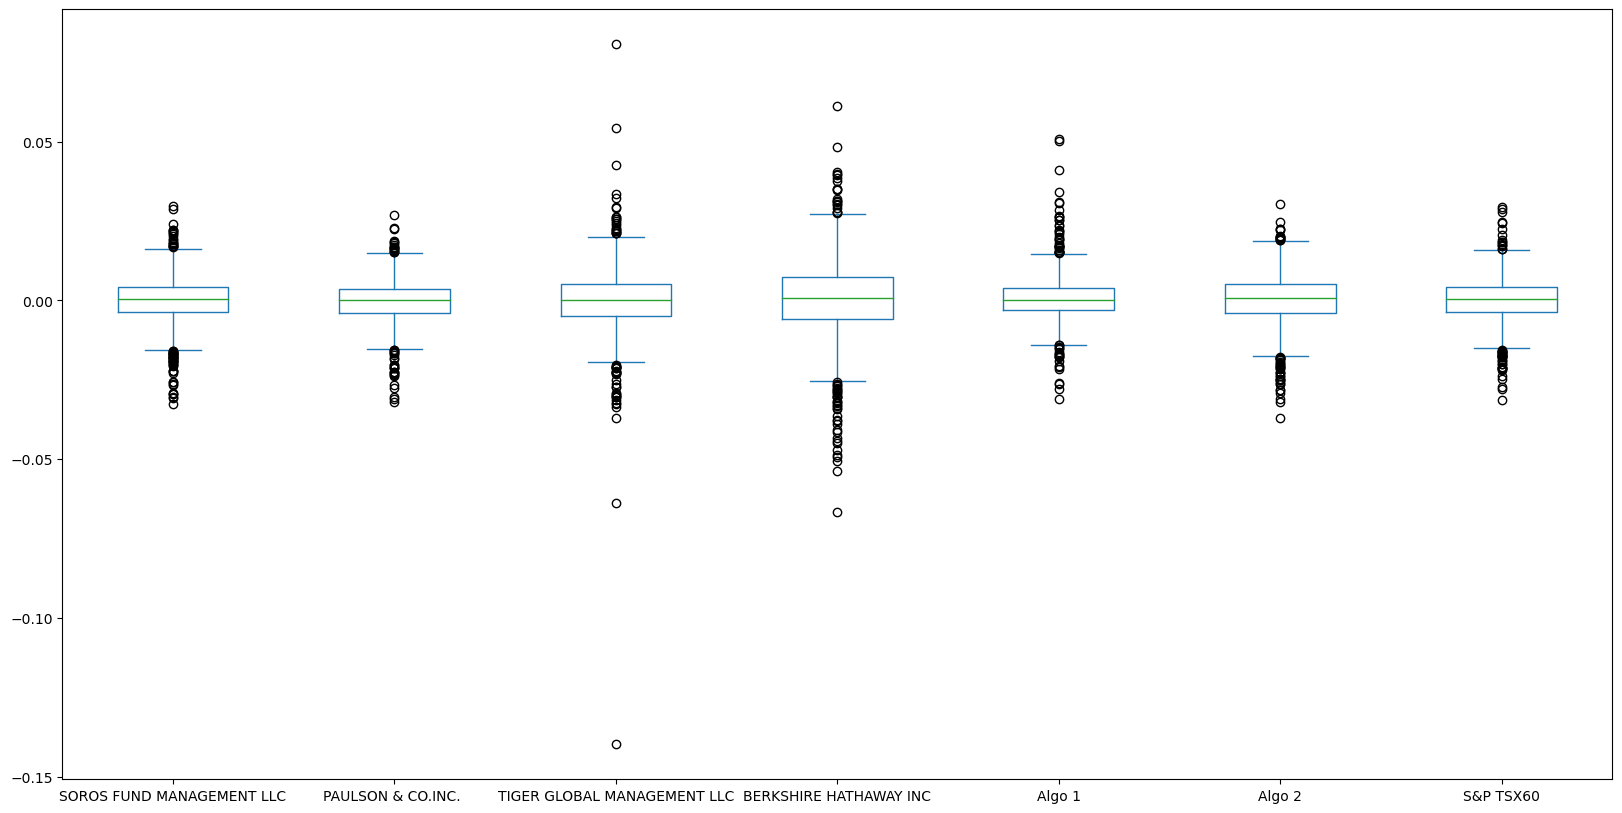

In [24]:
# Box plot to visually show risk
combined_df.plot(kind='box', figsize = (20,10))

### Calculate Standard Deviations

In [36]:
# Calculate the daily standard deviations of all portfolios
standard_deviation = combined_df.std()
standard_deviation.head(10)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX60                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60


Algo 1 SOROS FUND MANAGEMENT LLC 0.007828 Algo 2 0.008326 TIGER GLOBAL MANAGEMENT LLC 0.010883 BERKSHIRE HATHAWAY INC 0.012826 


### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = combined_df.std()* np.sqrt(252)
annualized_standard_deviation.head(10)
annualized_standard_deviation.sort_values()

PAULSON & CO.INC.              0.110841
S&P TSX60                      0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling statistics for all portfolios'}, xlabel='Date'>

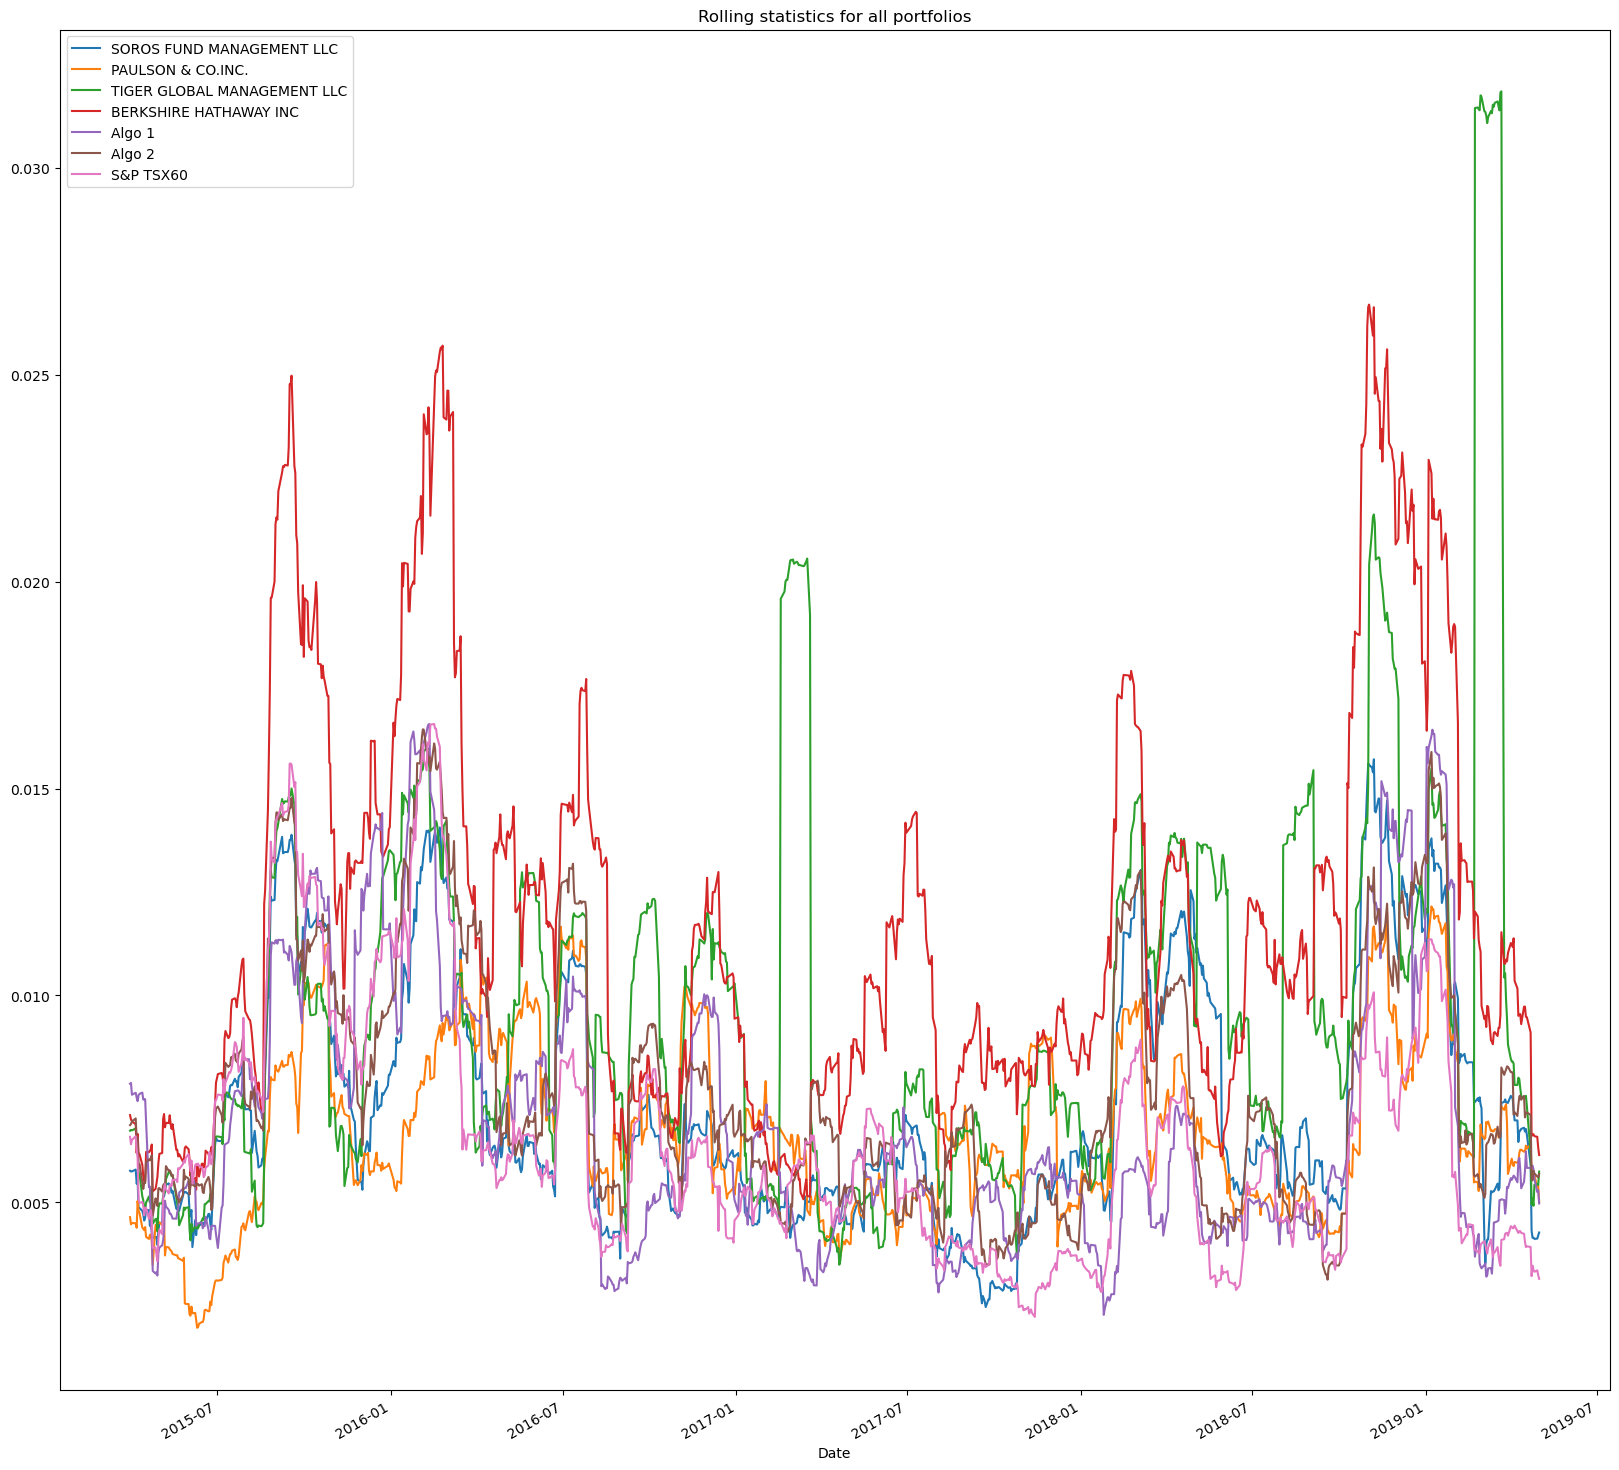

In [44]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21_days = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_21_days.plot(figsize = (20,20), title = "Rolling statistics for all portfolios")

### Calculate and plot the correlation

<AxesSubplot:>

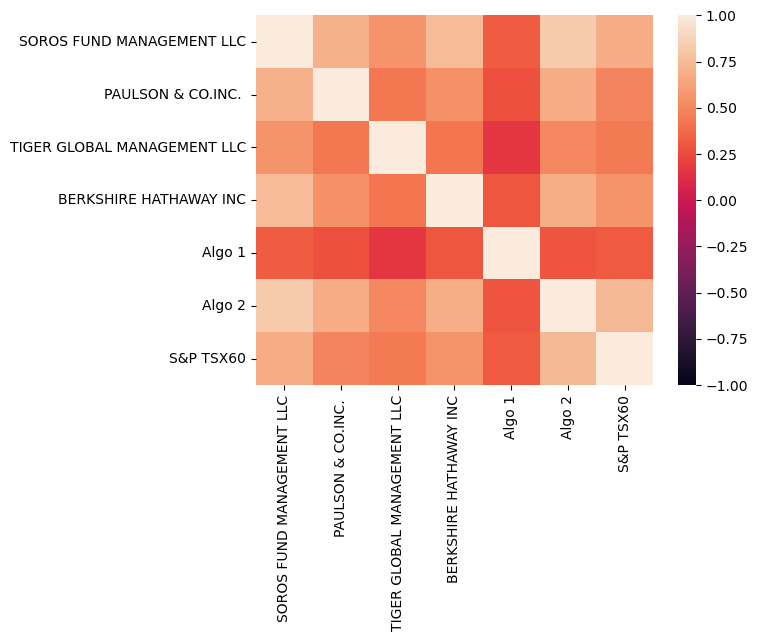

In [47]:
# Calculate the correlation
price_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

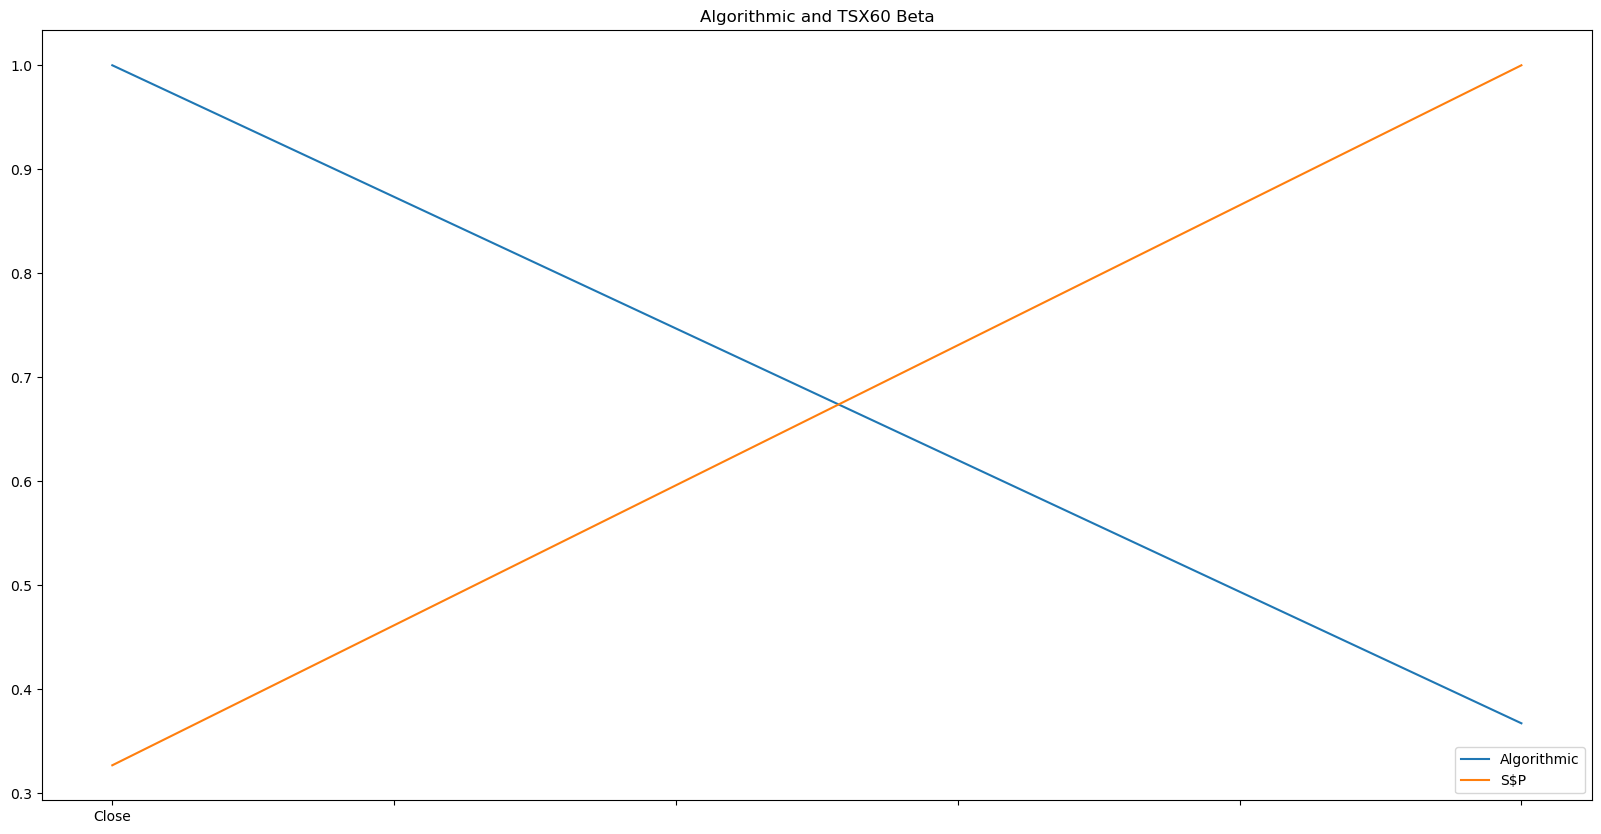

In [49]:
# Calculate covariance of a single portfolio
#algorithmic convariance
algo_portfolio_convariance = algo_df.cov()

# Calculate variance of S&P TSX
TSX60_variance = tsx60_daily_return.var()
# Computing beta
#algo_beta
algo_beta = algo_portfolio_convariance / algo_df.var()
#tsx_beta
tsx_beta = tsx60_df.cov() /TSX60_variance
# Plot beta trend
ax = algo_beta.plot(figsize=(20,10), title = "Algorithmic and TSX60 Beta")
tsx_beta.plot(ax=ax)
ax.legend(["Algorithmic", "S$P"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [67]:
# Use `ewm` to calculate the rolling window

ewm_window = rolling_std_21_days.ewm(span=21).mean()
ewm_window


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.006090,0.006169,0.009405,0.009158,0.005613,0.006923,0.003954
2019-04-26,0.005911,0.006121,0.009043,0.008926,0.005609,0.006812,0.003896
2019-04-29,0.005748,0.006053,0.008715,0.008713,0.005576,0.006704,0.003847


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Annualized Sharpe Ratios
sharp_ratio = combined_df.mean() / combined_df.std()
annualized_sharp_ratio = sharp_ratio*252**.5
annualized_sharp_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX60                      0.195550
dtype: float64

<AxesSubplot:>

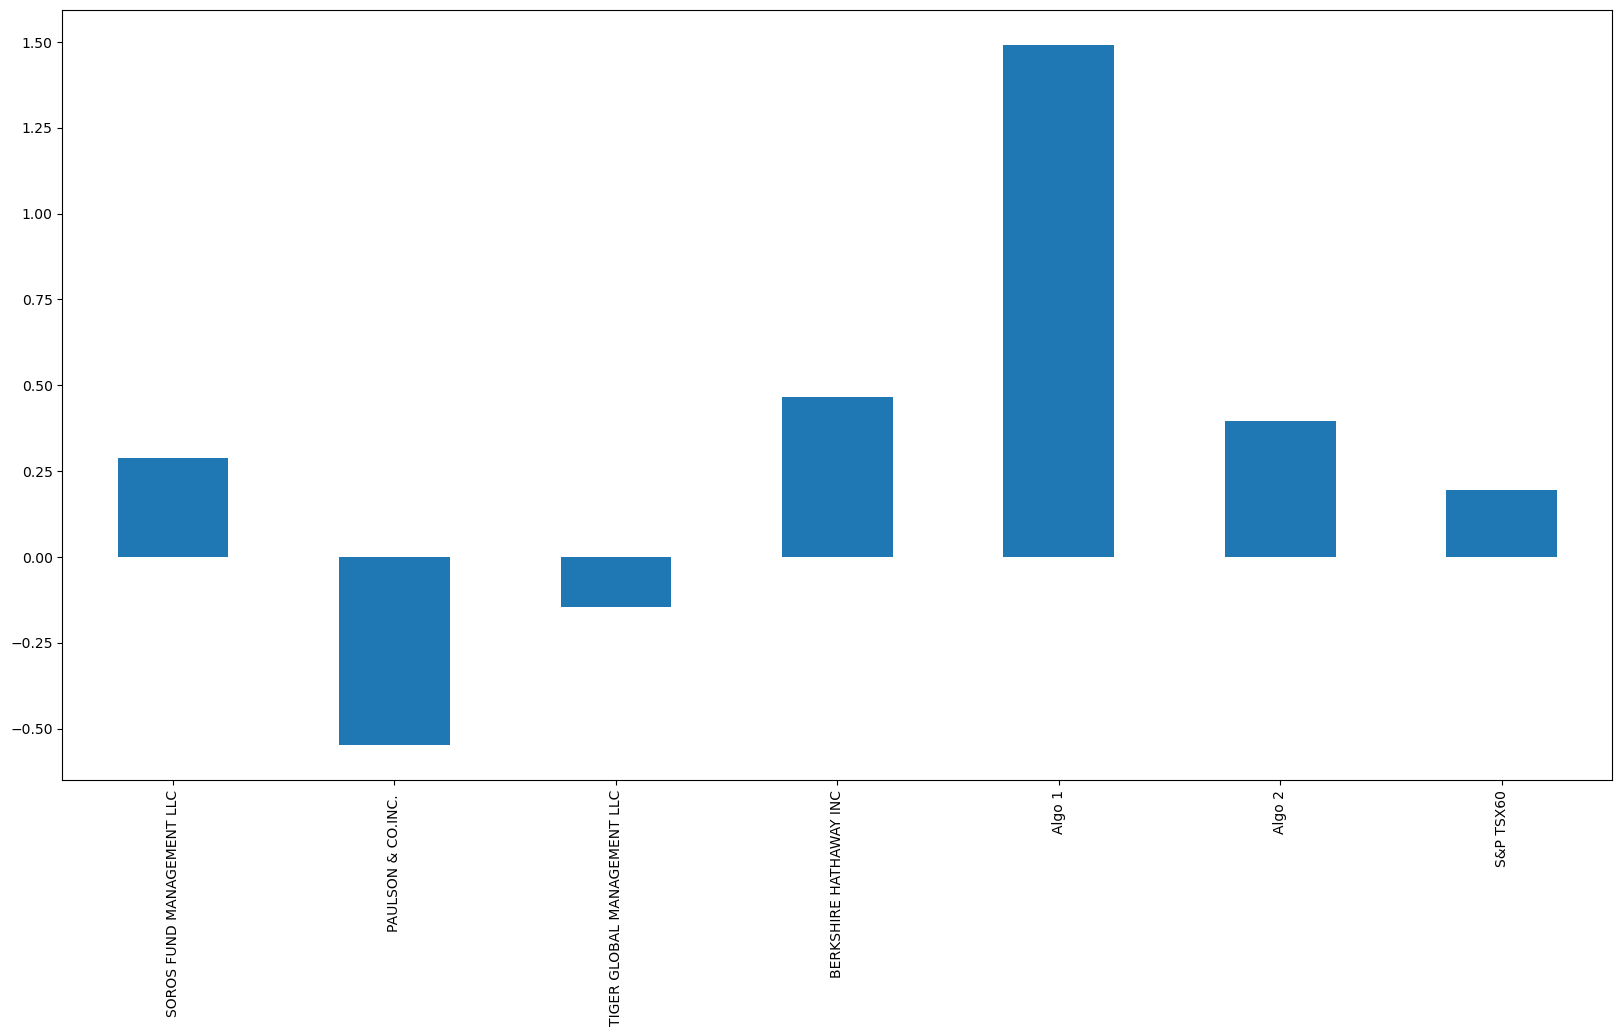

In [69]:
# Visualize the sharpe ratios as a bar plot
annualized_sharp_ratio.plot(kind='bar', figsize=(20,10))

 Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.


#The Algorithmic portfolio and particulary (Algo 1) outperforms both the S&P TSX and Whales Portfolio because it has a higher sharp ratio and low Standard deviation meaning it less rick and good return.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [71]:
# Reading data from 1st stock
tpx_df = pd.read_csv(r"C:\Users\Yvonne Colangelo\Downloads\TPX - Sheet2.csv", infer_datetime_format = True)

tpx_df['Date'] = pd.to_datetime(tpx_df['Date'], errors= 'coerce')

tpx_df['Date'] = tpx_df['Date'].dt.date

tpx_df.set_index('Date', inplace=True)
tpx_df.sort_index()
tpx_df.head()

,Close
Date,
2015-03-03,14.38
2015-04-03,14.30
2015-05-03,14.21
2015-06-03,13.93
2015-09-03,13.96


In [73]:
# Reading data from 2nd stock
aap_df = pd.read_csv(r"C:\Users\Yvonne Colangelo\Downloads\Untitled spreadsheet - Sheet1.csv",infer_datetime_format = True)

aap_df['Date'] = pd.to_datetime(aap_df['Date'],errors='coerce')

aap_df['Date'] = aap_df['Date'].dt.date
aap_df.set_index('Date', inplace=True)
aap_df.sort_index()
aap_df.head()


,Close
Date,
2015-03-03,154.47
2015-04-03,150.83
2015-05-03,152.52
2015-06-03,149.07
2015-09-03,148.29


In [74]:
# Reading data from 3rd stock
bats_df =pd.read_csv(r"C:\Users\Yvonne Colangelo\Downloads\BATS - Sheet3.csv", infer_datetime_format = True)

bats_df['Date'] = pd.to_datetime(bats_df['Date'],errors='coerce')
bats_df['Date'] = bats_df['Date'].dt.date


bats_df.set_index('Date', inplace=True)
bats_df.sort_index()
bats_df.head()

,Close
Date,
2015-03-03,3767.0
2015-04-03,3813.0
2015-05-03,3892.5
2015-06-03,3825.5
2015-09-03,3756.0


In [76]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([aap_df, bats_df, tpx_df], axis = "columns", join="inner")
combined_stocks.head()

,Close,Close,Close
Date,,,
2015-03-03,154.47,3767.0,14.38
2015-04-03,150.83,3813.0,14.30
2015-05-03,152.52,3892.5,14.21
2015-06-03,149.07,3825.5,13.93
2015-09-03,148.29,3756.0,13.96


In [77]:
# Reset Date index
combined_stocks.reset_index()

,Date,Close,Close,Close
0,2015-03-03,154.47,3767.0,14.38
1,2015-04-03,150.83,3813.0,14.30
2,2015-05-03,152.52,3892.5,14.21
3,2015-06-03,149.07,3825.5,13.93
4,2015-09-03,148.29,3756.0,13.96
...,...,...,...,...
492,2017-02-24,157.33,5070.0,11.49
493,2017-02-27,156.94,5092.0,11.61
494,2017-02-28,156.61,5080.0,11.55
495,2017-01-03,156.68,5161.0,11.81


In [79]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.columns = ['AAP', 'BATS', 'TPX']
combined_stocks.head()

,AAP,BATS,TPX
Date,,,
2015-03-03,154.47,3767.0,14.38
2015-04-03,150.83,3813.0,14.30
2015-05-03,152.52,3892.5,14.21
2015-06-03,149.07,3825.5,13.93
2015-09-03,148.29,3756.0,13.96


In [85]:
# Calculate daily returns
daily_returns = combined_stocks.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.head()

,AAP,BATS,TPX
Date,,,
2015-04-03,-0.023564,0.012211,-0.005563
2015-05-03,0.011205,0.020850,-0.006294
2015-06-03,-0.022620,-0.017213,-0.019704
2015-09-03,-0.005232,-0.018168,0.002154
2015-10-03,-0.011869,-0.027556,0.002865


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [86]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return =daily_returns.dot(weights)
portfolio_return
# Display sample data


Date
2015-04-03   -0.005639
2015-05-03    0.008587
2015-06-03   -0.019846
2015-09-03   -0.007082
2015-10-03   -0.012186
                ...   
2017-02-24   -0.005307
2017-02-27    0.004101
2017-02-28   -0.003209
2017-01-03    0.012968
2017-02-03   -0.009102
Length: 496, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [107]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([combined_df, daily_returns], axis ="columns", join="outer")
joined_df

C:\Users\Yvonne Colangelo\anaconda3\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3817: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  indexer = self._engine.get_indexer(tgt_values)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60,AAP,BATS,TPX
Date,,,,,,,,,,
2015-03-03 00:00:00,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN,NaN,NaN
2015-03-04 00:00:00,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN,NaN,NaN
2015-03-05 00:00:00,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN,NaN,NaN
2015-03-06 00:00:00,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN,NaN,NaN
2015-03-09 00:00:00,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-02-24,0.001097,-0.003004,0.001260,-0.002846,-0.001867,-0.001231,-0.015698,-0.002473,0.001976,-0.015424
2017-02-27,0.002716,0.003897,-0.018914,0.009087,0.000315,0.006968,-0.004504,-0.002479,0.004339,0.010444
2017-02-28,-0.008588,-0.006878,0.005769,-0.006000,-0.001108,-0.008883,-0.004156,-0.002103,-0.002357,-0.005168


In [108]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df = joined_df.dropna()
joined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60,AAP,BATS,TPX
Date,,,,,,,,,,
2015-05-29 00:00:00,-0.001533,0.000059,-0.004973,-0.005498,-0.001715,-0.005320,-0.006150,-0.020019,-0.023297,0.002017
2015-06-03,0.003248,-0.000080,0.001013,0.001017,-0.005906,0.007484,0.003306,-0.022620,-0.017213,-0.019704
2015-09-03,0.002879,-0.001426,0.005152,-0.009052,0.001383,-0.001680,0.003777,-0.005232,-0.018168,0.002154
2015-11-03,0.005853,0.002269,0.007130,0.014331,0.019469,0.000629,0.006408,0.005460,-0.006982,-0.005714
2015-12-03,-0.012023,-0.007407,-0.018869,-0.015716,0.007114,-0.013703,-0.010335,0.013507,0.003998,0.012931
...,...,...,...,...,...,...,...,...,...,...
2017-02-24,0.001097,-0.003004,0.001260,-0.002846,-0.001867,-0.001231,-0.015698,-0.002473,0.001976,-0.015424
2017-02-27,0.002716,0.003897,-0.018914,0.009087,0.000315,0.006968,-0.004504,-0.002479,0.004339,0.010444
2017-02-28,-0.008588,-0.006878,0.005769,-0.006000,-0.001108,-0.008883,-0.004156,-0.002103,-0.002357,-0.005168


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [109]:
# Calculate the annualized `std`
annual_standard_deviation = joined_df.std()* np.sqrt(252)
annual_standard_deviation.head(10)
annual_standard_deviation.sort_values()

PAULSON & CO.INC.              0.116602
SOROS FUND MANAGEMENT LLC      0.124470
Algo 1                         0.131571
S&P TSX60                      0.132194
Algo 2                         0.145033
TIGER GLOBAL MANAGEMENT LLC    0.164915
BATS                           0.199194
BERKSHIRE HATHAWAY INC         0.201709
AAP                            0.295273
TPX                            0.442899
dtype: float64

### Calculate and plot rolling `std` with 21-day window

C:\Users\Yvonne Colangelo\anaconda3\anaconda3\lib\site-packages\pandas\core\indexes\base.py:2185: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_monotonic_increasing
C:\Users\Yvonne Colangelo\anaconda3\anaconda3\lib\site-packages\pandas\core\sorting.py:417: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  indexer = non_nan_idx[non_nans.argsort(kind=kind)]


<AxesSubplot:title={'center':'Rolling statistics for all portfolios'}, xlabel='Date'>

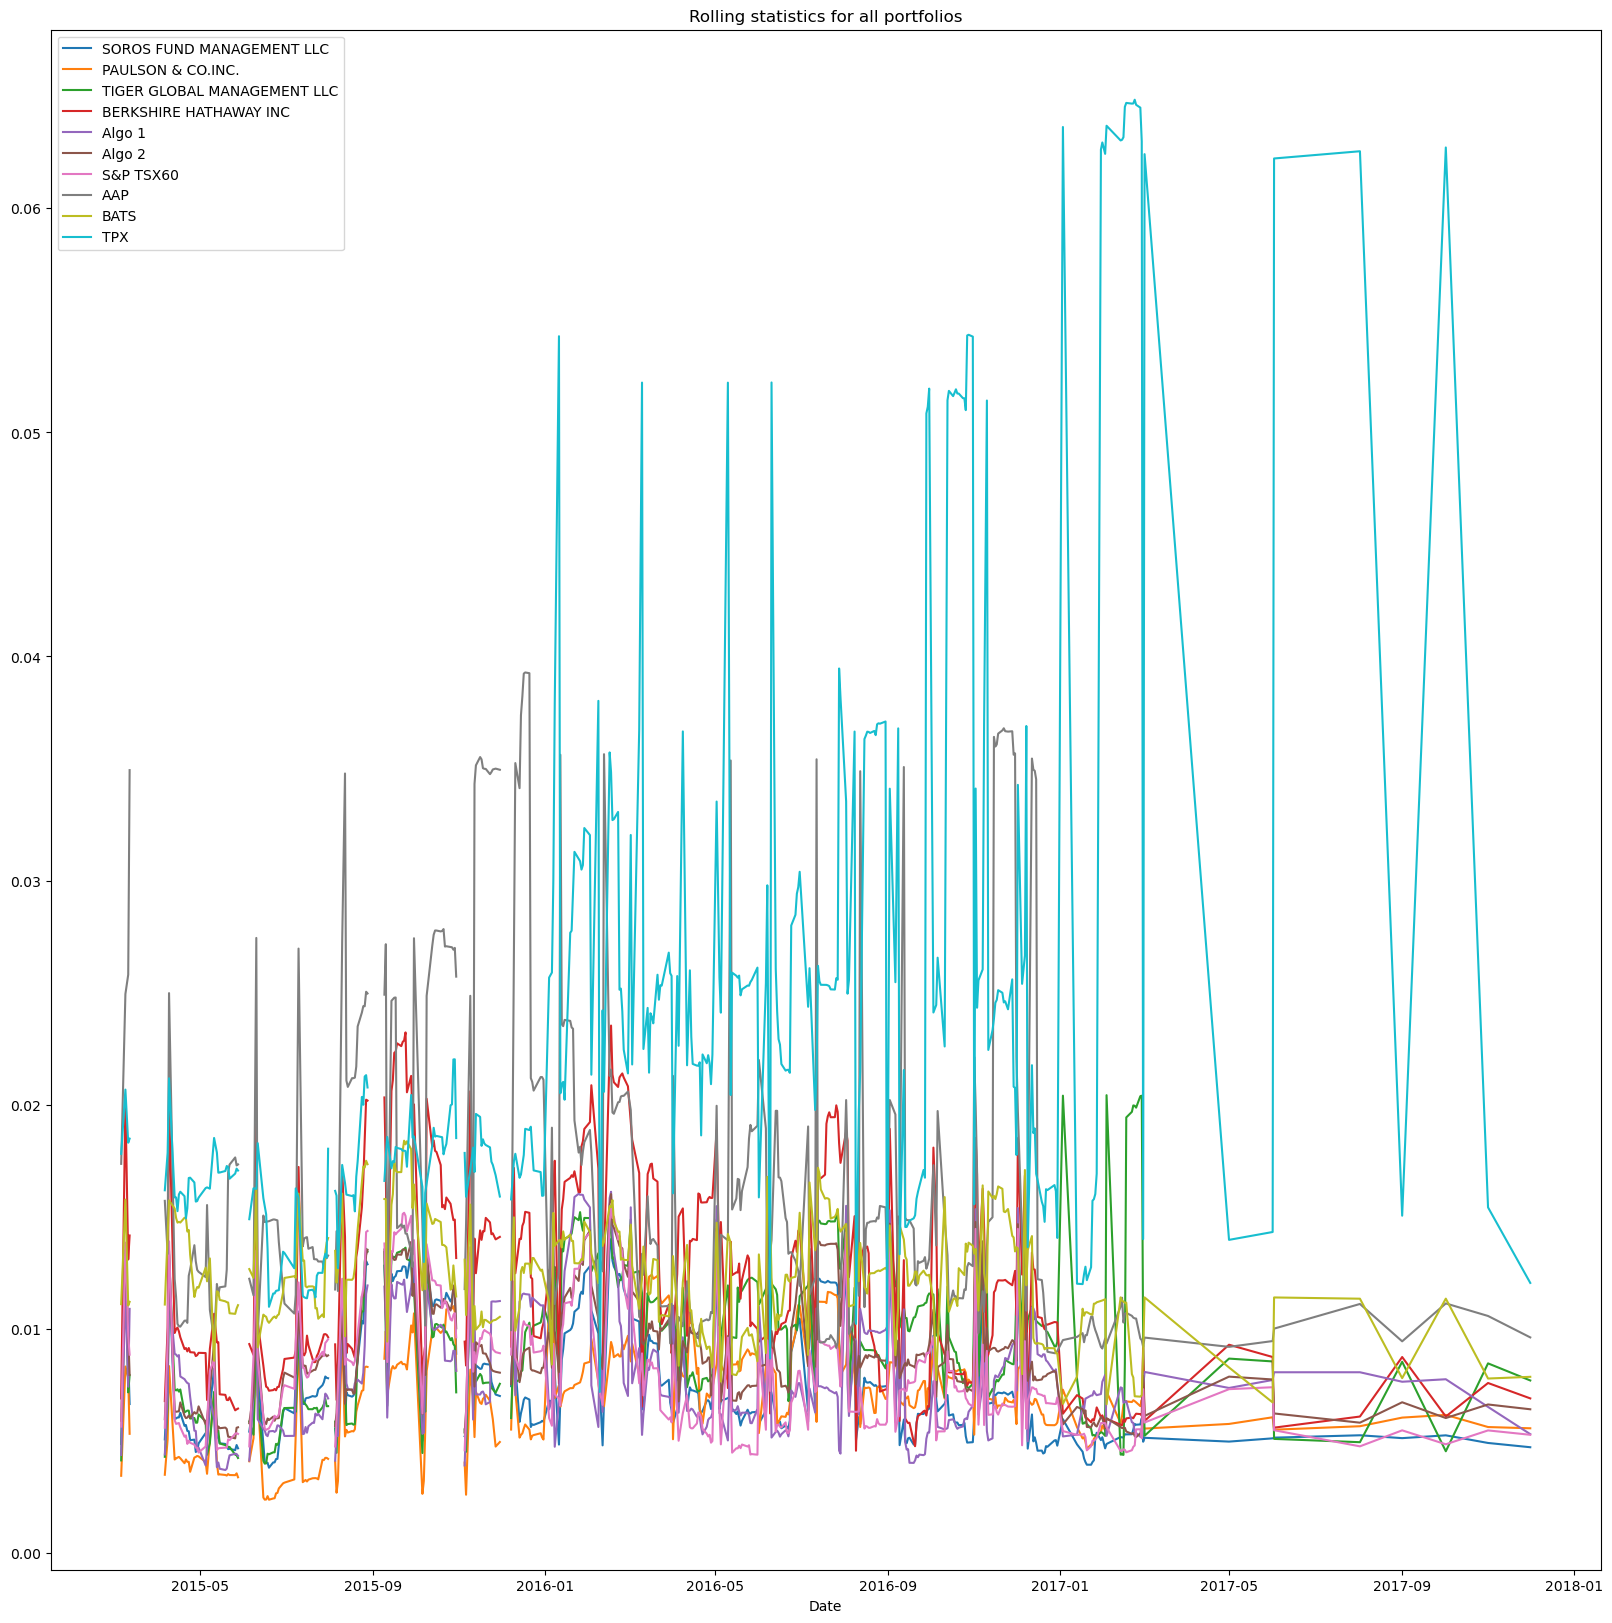

In [110]:
# Calculate rolling standard deviation
rolling_std_21_days = joined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_21_days.plot(figsize = (20,20), title = "Rolling statistics for all portfolios")

### Calculate and plot the correlation

<AxesSubplot:>

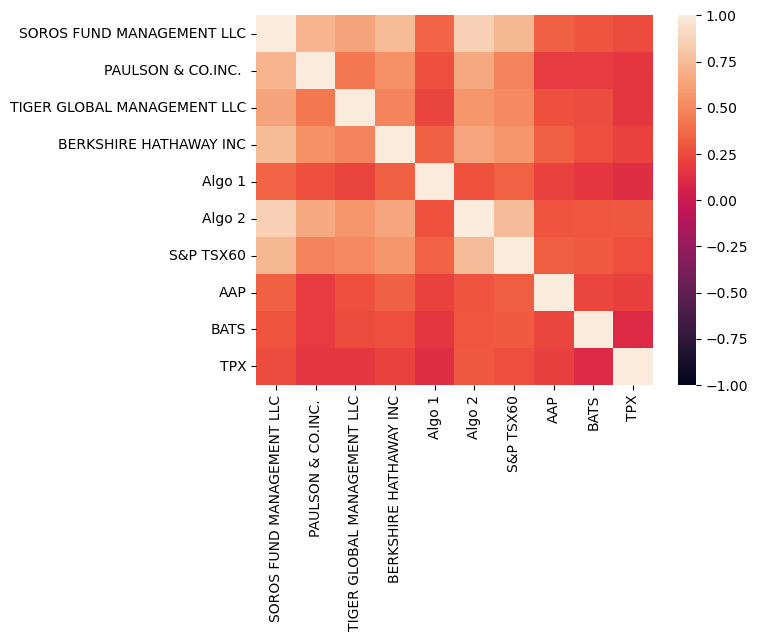

In [111]:
# Calculate and plot the correlation
joined_corr = joined_df.corr()
sns.heatmap(joined_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60,AAP,BATS,TPX
SOROS FUND MANAGEMENT LLC,1.000000,0.759239,0.482219,0.458458,0.327238,0.737439,0.685443,0.140517,0.178395,0.070793
PAULSON & CO.INC.,0.666283,1.000000,0.305839,0.313013,0.238300,0.529381,0.431649,0.074002,0.108225,0.041454
TIGER GLOBAL MANAGEMENT LLC,0.846513,0.611790,1.000000,0.401258,0.278110,0.645236,0.635780,0.151649,0.211557,0.060532
BERKSHIRE HATHAWAY INC,1.203974,0.936700,0.600277,1.000000,0.510203,0.898131,0.860147,0.228103,0.263286,0.098775
Algo 1,0.365637,0.303410,0.177017,0.217076,1.000000,0.248444,0.336405,0.095132,0.103933,0.037044
Algo 2,1.001212,0.819009,0.499033,0.464325,0.301886,1.000000,0.831300,0.138754,0.214739,0.098454
S&P TSX60,0.773153,0.554811,0.408518,0.369445,0.339602,0.690641,1.000000,0.143672,0.205955,0.078585
AAP,0.790758,0.474545,0.486145,0.488798,0.479132,0.575122,0.716795,1.000000,0.341212,0.139495
BATS,0.456883,0.315841,0.308645,0.256762,0.238226,0.405072,0.467628,0.155285,1.000000,0.044050
TPX,0.896324,0.598087,0.436588,0.476217,0.419768,0.918138,0.882109,0.313848,0.217771,1.000000


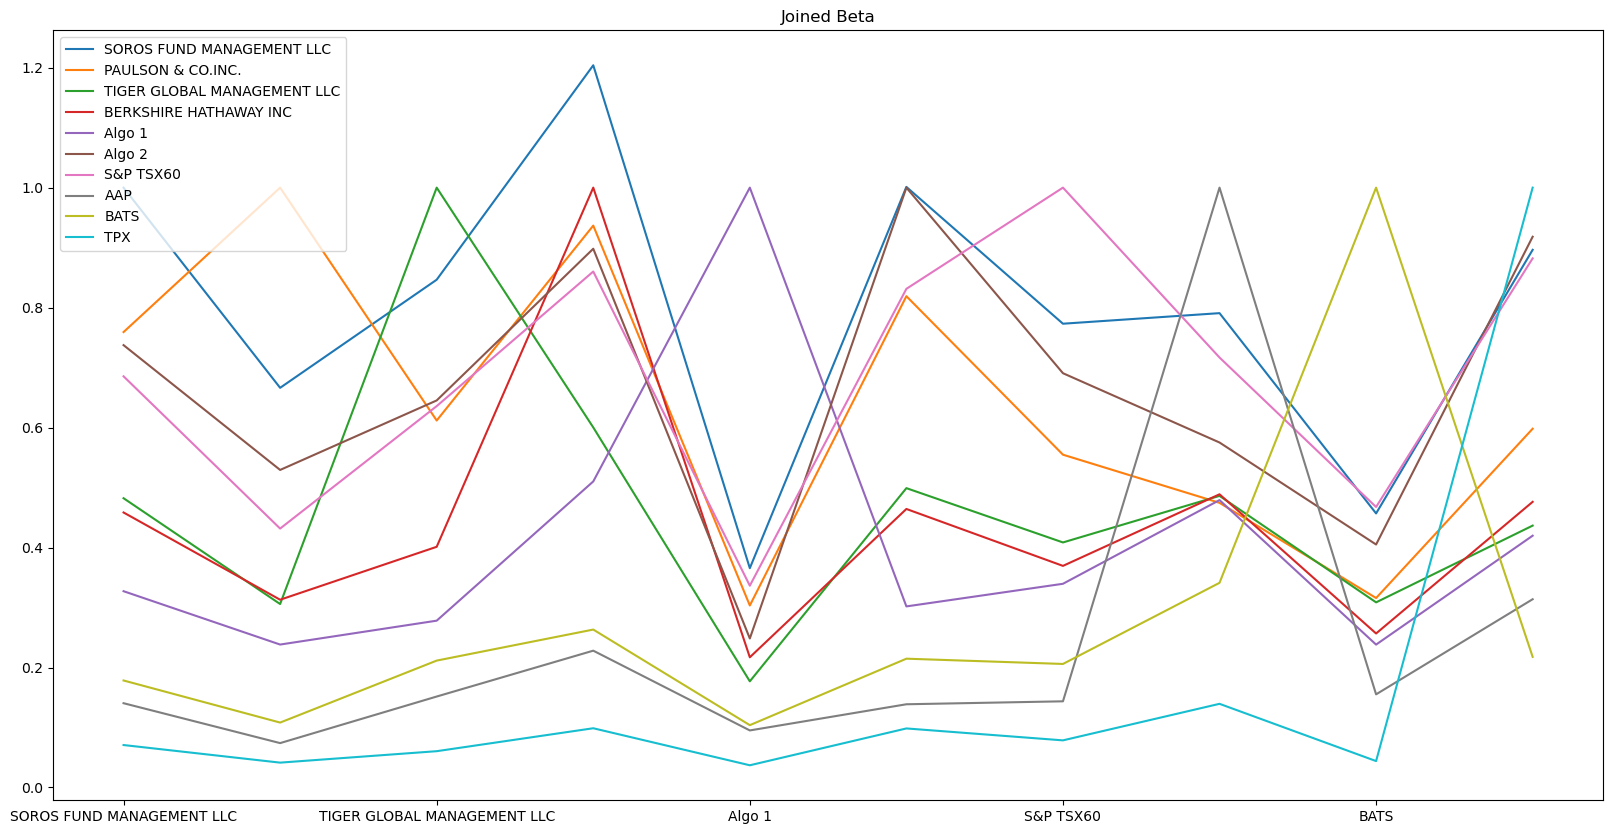

In [112]:
# Calculate and plot Beta
joined_beta = joined_df.cov() / joined_df.var()
joined_beta.plot(figsize = (20,10), title= "Joined Beta")
joined_beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [113]:
# Calculate Annualized Sharpe Ratios
joined_sharp_ratio = joined_df.mean() / joined_df.std()

#annualized 
joined_sharp_ratio = joined_sharp_ratio*252**.5
joined_sharp_ratio

SOROS FUND MANAGEMENT LLC     -0.285719
PAULSON & CO.INC.             -0.659812
TIGER GLOBAL MANAGEMENT LLC    1.152485
BERKSHIRE HATHAWAY INC        -0.188356
Algo 1                         1.223301
Algo 2                         0.148797
S&P TSX60                      0.012673
AAP                            0.028462
BATS                           1.026622
TPX                           -0.252830
dtype: float64

<AxesSubplot:title={'center':'joined visualised sharp ratio'}>

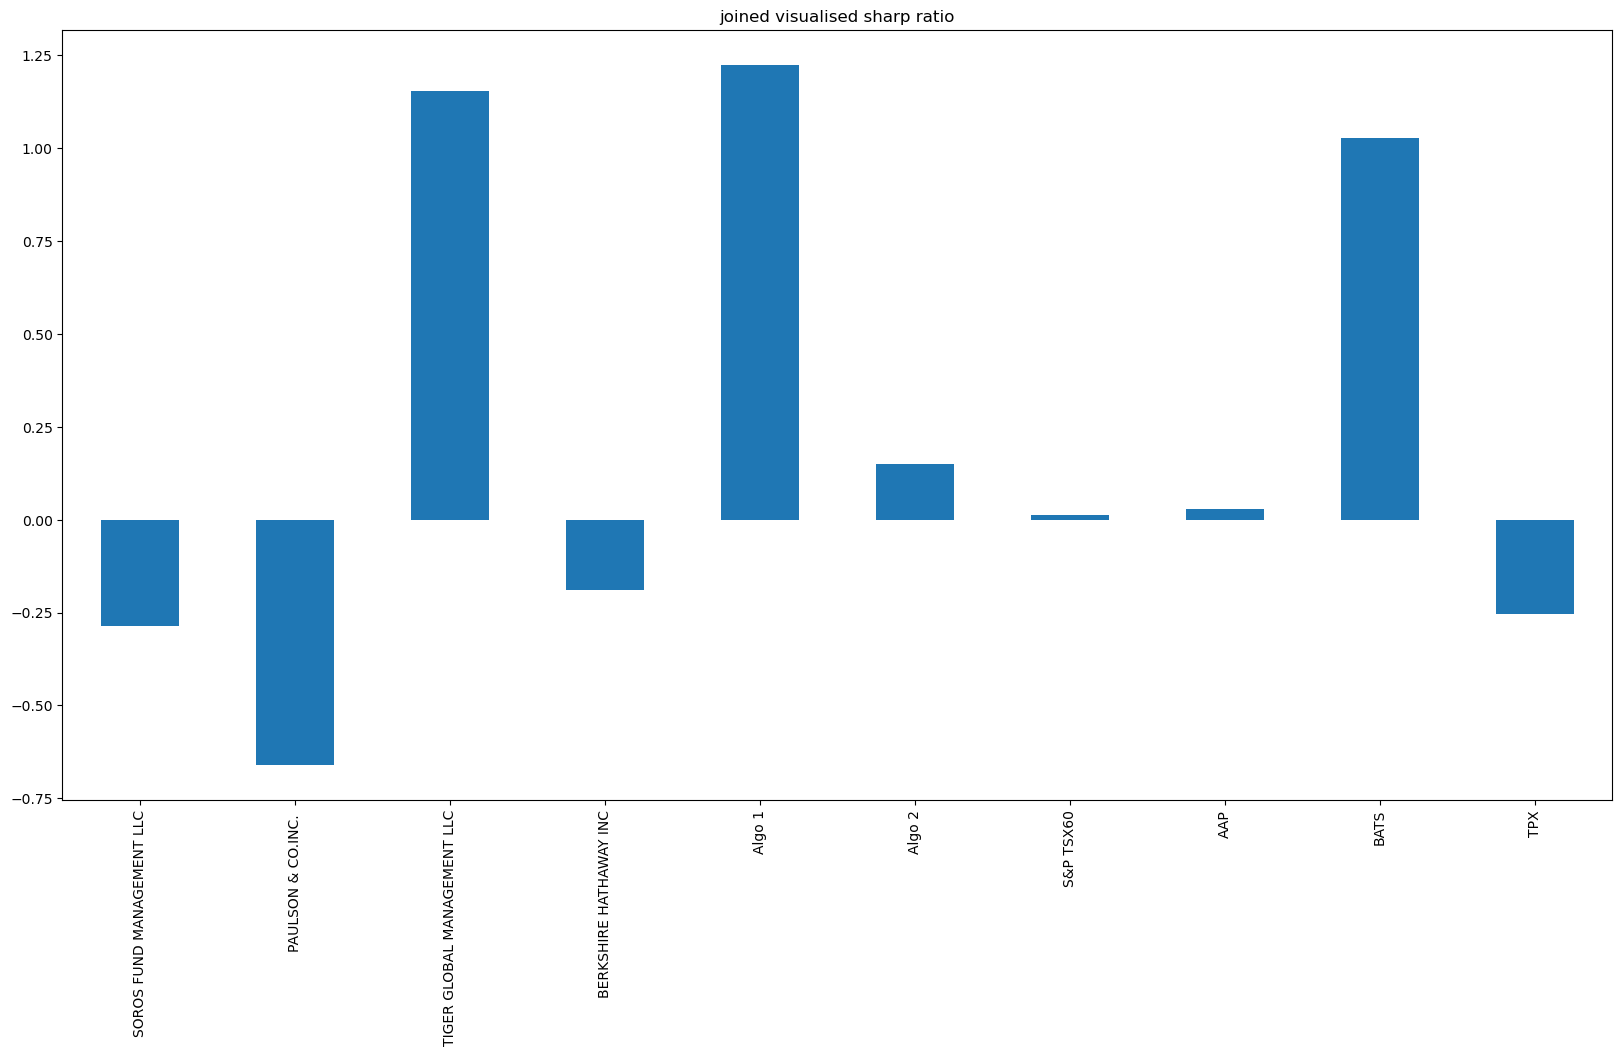

In [114]:
# Visualize the sharpe ratios as a bar plot
joined_sharp_ratio.plot(figsize = (20,10),kind="bar", title = "joined visualised sharp ratio")

### How does your portfolio do?

My portfolio is definately riskier because it is more volatile and has a high standard deviation compared to the S$P TSX60. Because of it's high volatility is also yields high returns in a bull market with the exception of the TPX. 